## Hierarchical clustering with 2D toy datasets

## [教學目標]

將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

因為非監督模型的效果, 較難以簡單的範例看出來

所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,

同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

## [範例重點]

以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

# 生成 稀疏三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# 生成 斜向三群 資料點
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

In [3]:
# 設定群集與繪圖參數
plt.figure(figsize=(20, 16))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors': 2}), (aniso, {'n_neighbors': 2})]

<Figure size 1440x1152 with 0 Axes>

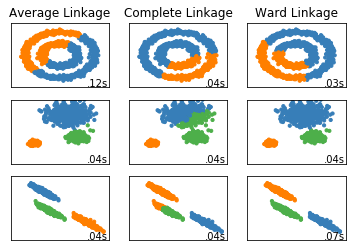

In [4]:
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=12)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

## 觀察結果

>同心圓 : 三者效果中 Complete 的效果似乎是最差

> 三群 : Average 與 Ward 效果都還不錯

> 斜三群 : 三者效果也是以 Complete 較差

同學可以試著替換不同的 random_state 觀察, 會有不同的結果

## Hierarchical clustering with 2D toy datasets

## [作業目標]

將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

## [作業重點]

以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]

以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [5]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [6]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

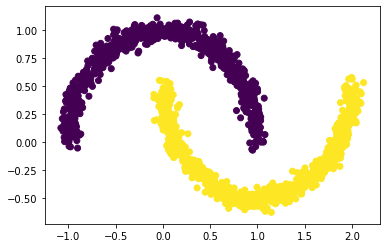

In [7]:
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c=noisy_moons[1])

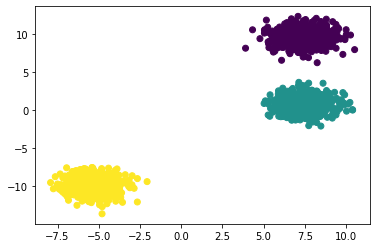

In [8]:
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])

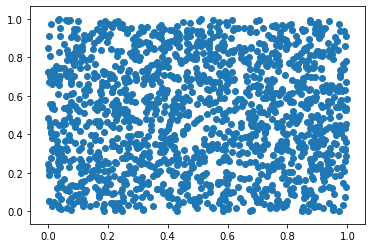

In [9]:
plt.scatter(no_structure[0][:,0], no_structure[0][:,1], c=no_structure[1])

In [10]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters': 3}
datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {}), (no_structure, {})]

<Figure size 720x576 with 0 Axes>

## 執行各種樣板資料的繪圖迴圈

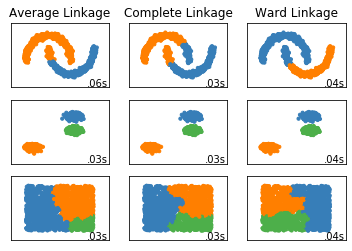

In [11]:
# 執行各種樣板資料的繪圖迴圈
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # 複製參數與標準化
    params = default_base.copy()
    params.update(algo_params)    
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 設定三種不同參數的 Hierarchical clustering
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))

    # 繪製三種圖形
    for name, algorithm in clustering_algorithms:
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=12)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

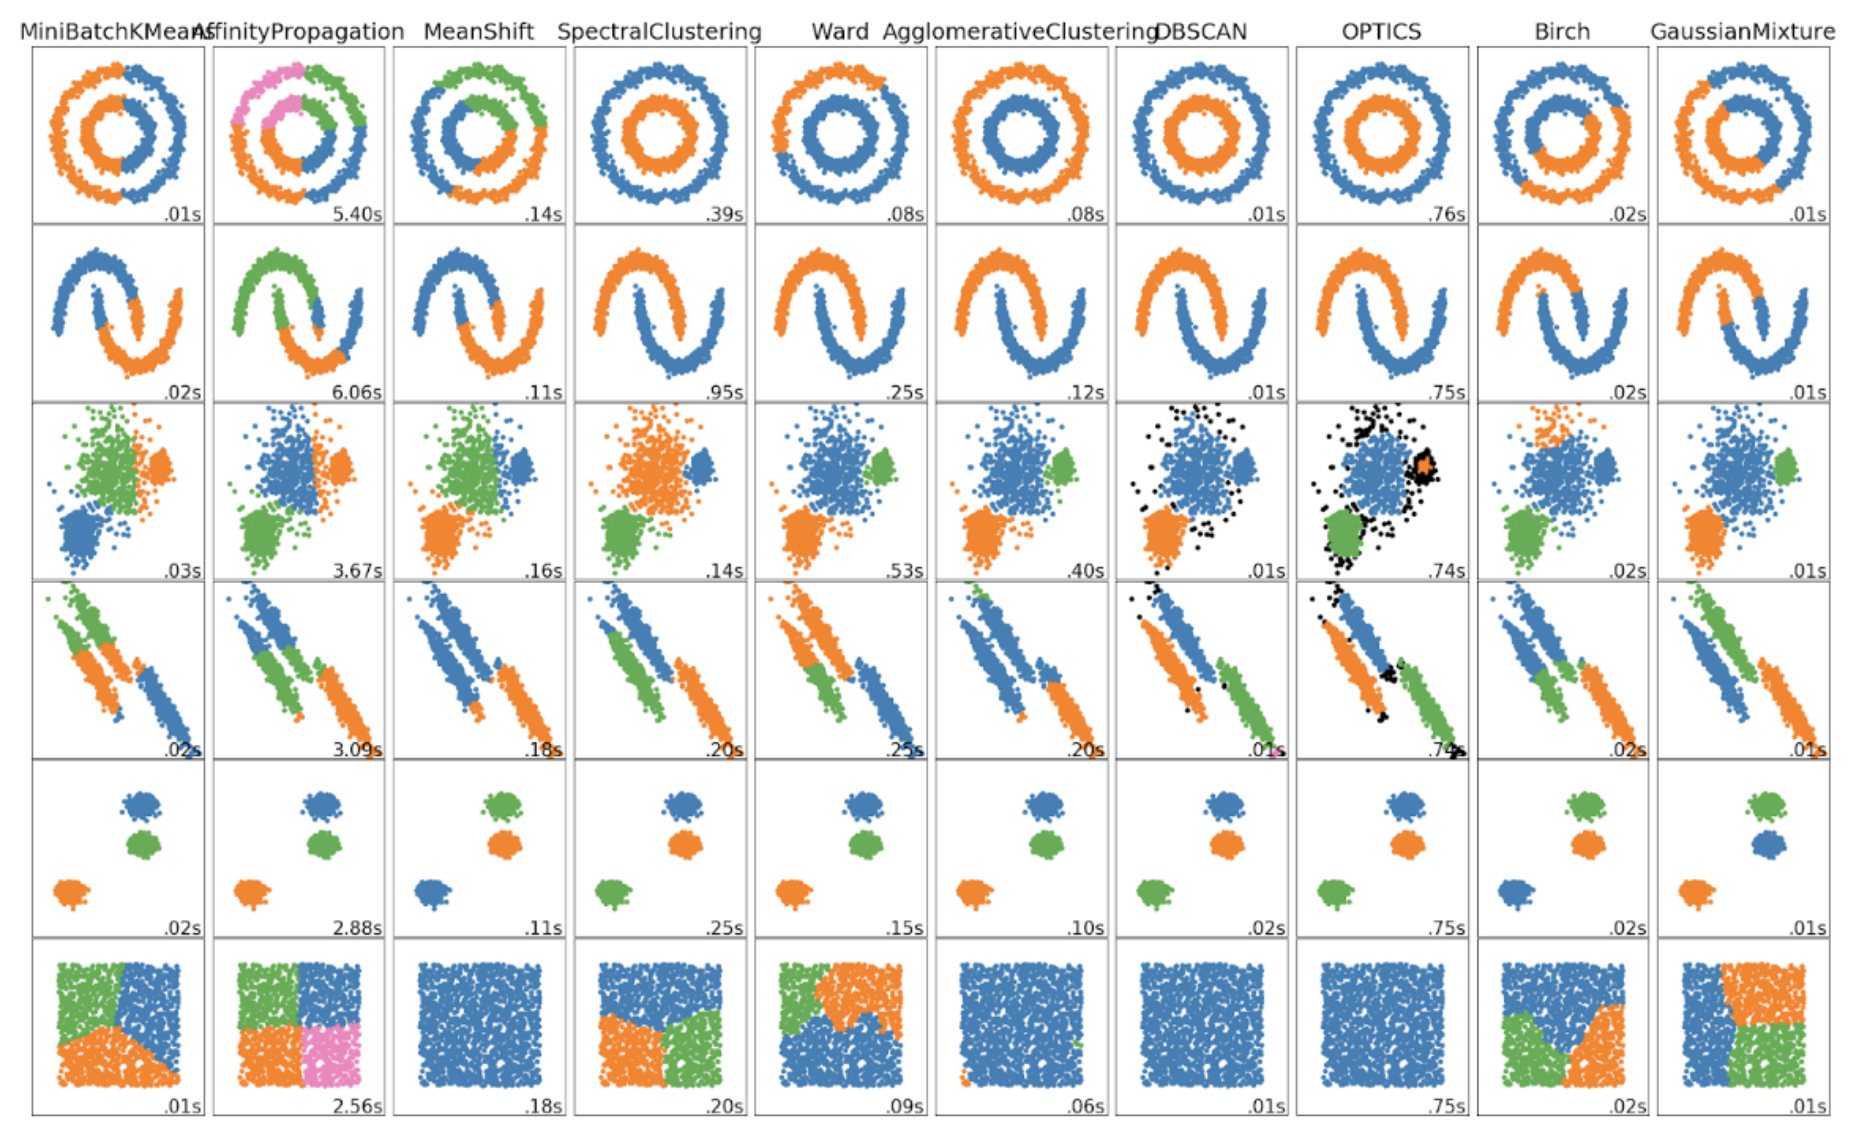

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

In [12]:
noisy_moons

(array([[ 0.69845905,  0.66487236],
        [-1.00479107,  0.21707938],
        [ 1.974394  ,  0.30474892],
        ...,
        [-1.06492148,  0.11868986],
        [-0.30519674,  0.99491472],
        [ 0.70876355,  0.62722453]]), array([0, 0, 1, ..., 0, 0, 0]))

In [3]:
# 生成 同心圓 資料點
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_circles

(array([[-0.45145157, -0.04494148],
        [-0.37482968,  0.90626183],
        [ 0.87361563, -0.38194875],
        ...,
        [-0.23785266, -0.4224708 ],
        [ 0.43954153,  0.07002608],
        [ 0.40817887,  0.10532859]]), array([1, 0, 0, ..., 1, 1, 1]))

In [4]:
# 生成 稀疏三群 資料點 (使用轉換矩陣)
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
X

array([[ -1.55786982,   6.71214805],
       [ -0.80960291,   6.97008246],
       [-11.32949678,  -5.81781541],
       ...,
       [ -9.88486876,  -8.16923687],
       [ -0.09761683,  -3.42312253],
       [-10.149969  ,  -6.67803805]])

In [6]:
display(len(y))
y

1500

array([1, 1, 2, ..., 2, 0, 2])

In [8]:
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [9]:
X_aniso

array([[-3.61958111,  6.30444034],
       [-3.27379473,  6.06182771],
       [-4.47057191,  2.14344574],
       ...,
       [-2.66322651, -0.60446824],
       [ 1.31067891, -2.67992793],
       [-3.41876618,  0.74755096]])

In [10]:
aniso

(array([[-3.61958111,  6.30444034],
        [-3.27379473,  6.06182771],
        [-4.47057191,  2.14344574],
        ...,
        [-2.66322651, -0.60446824],
        [ 1.31067891, -2.67992793],
        [-3.41876618,  0.74755096]]), array([1, 1, 2, ..., 2, 0, 2]))

In [11]:
# 生成 斜向三群 資料點
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
varied

(array([[ -1.63020227,   6.43708617],
        [  0.240465  ,   7.08192217],
        [-10.61755983,  -6.6932165 ],
        ...,
        [ -9.89524582,  -7.86892722],
        [ -0.09761683,  -3.42312253],
        [-10.02779594,  -7.12332782]]), array([1, 1, 2, ..., 2, 0, 2]))